In [4]:
import requests
from IPython.core.display import HTML
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import mean_squared_error
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks

# TensorFlow and tf.keras
import tensorflow as tf

%matplotlib inline

In [5]:
input_path = 'C:\\Users\\rohan\\Desktop\\project hurricane'

In [8]:
def print_file_sizes(input_path, subset):
  print('{}:'.format(subset))
  print('')
  path = input_path + subset + '/'
  for f in os.listdir(path):
    if not os.path.isdir(path + f):
      print(f.ljust(30) + str(round(os.path.getsize(path + f) / 1000000, 2)) + 'MB')
    else:
      sizes = [os.path.getsize(path+f+'/'+x)/1000000 for x in os.listdir(path + f)]
      print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
  print('')
    
print_file_sizes(input_path, '/train_another')
print_file_sizes(input_path, '/validation_another')
print_file_sizes(input_path, '/test_another')
print_file_sizes(input_path, '/test')

/train_another:

.DS_Store                     0.01MB
damage                        12.56MB (5000 files)
no_damage                     15.07MB (5000 files)

/validation_another:

damage                        2.52MB (1000 files)
no_damage                     3.02MB (1000 files)

/test_another:

damage                        20.12MB (8000 files)
no_damage                     3.01MB (1000 files)

/test:

.DS_Store                     0.01MB
damage                        2.53MB (1000 files)
no_damage                     2.99MB (1000 files)



In [22]:
import path

In [23]:
image_df = pd.DataFrame({'path': list(path(input_path).glob('**/*.jp*g'))})
image_df['damage'] = image_df['path'].map(lambda x: x.parent.stem)
image_df['data_split'] = image_df['path'].map(lambda x: x.parent.parent.stem)
image_df['location'] = image_df['path'].map(lambda x: x.stem)
image_df['lon'] = image_df['location'].map(lambda x: float(x.split('_')[0]))
image_df['lat'] = image_df['location'].map(lambda x: float(x.split('_')[-1]))
image_df['path'] = image_df['path'].map(lambda x: str(x)) # convert the path back to a string
image_df.head()

TypeError: 'module' object is not callable

In [20]:
#Generating quick plot of the spatial distribution of the images:
s = 10
alpha = 0.5

# get the train-validation-test splits
image_df_train = image_df[image_df['data_split']=='train_another'].copy()
image_df_val = image_df[image_df['data_split']=='validation_another'].copy()
image_df_test = image_df[image_df['data_split']=='test_another'].copy()

# sort to ensure reproducible behaviour
image_df_train.sort_values('lat', inplace=True)
image_df_val.sort_values('lat', inplace=True)
image_df_test.sort_values('lat', inplace=True)
image_df_train.reset_index(drop=True,inplace=True)
image_df_val.reset_index(drop=True,inplace=True)
image_df_test.reset_index(drop=True,inplace=True)
image_df_dmg = image_df[image_df['damage']=='damage'].copy()
image_df_nodmg = image_df[image_df['damage']=='no_damage'].copy()
image_df_dmg.reset_index(drop=True,inplace=True)
image_df_nodmg.reset_index(drop=True,inplace=True)

NameError: name 'image_df' is not defined

In [22]:
import cv2
img = cv2.imread(image_df['path'][0], cv2.IMREAD_UNCHANGED)
np.shape(img)

(128, 128, 3)

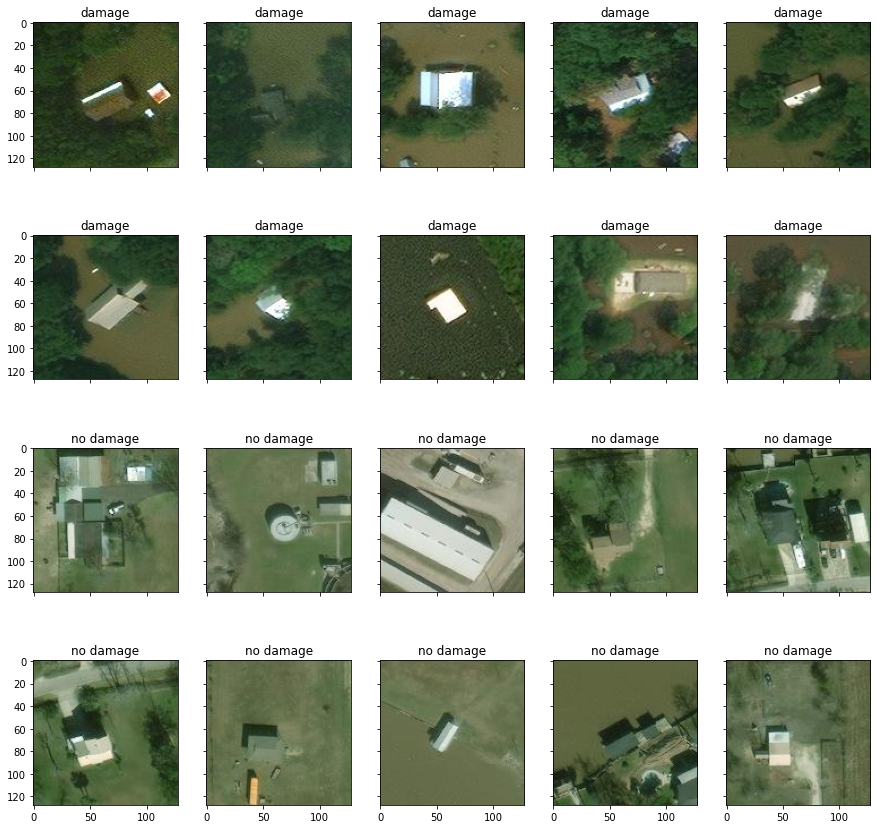

In [23]:
#Checking out images
fig, ax = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(15,15))
ax = ax.flatten()
for i in range(10):
  img = cv2.imread(image_df_dmg['path'][i], cv2.IMREAD_UNCHANGED)
  ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax[i].set_title('damage')
    
for i in range(10,20):
  img = cv2.imread(image_df_nodmg['path'][i], cv2.IMREAD_UNCHANGED)
  ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax[i].set_title('no damage')
    
plt.show()